**Word Embeddings**

Convert tokens to vectors of real numbers based on usage and context.

- Using Two Layer (Linear) Neural Network 

Feed $(n)$ one hot encoded samples call $X$  to Neural Network. Let $W_1(r,n)$ and $W_2(n,r)$ be weights of the first and second layer respectively. 

$Out = Softmax(W_{2}W_{1}X)$

The W1 weights are the representation vectors where each word has r dimensional vector.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [5]:
# Generating the Dataset
f = open("Datasets/Text.txt",'r')
words = f.read().split()
unique_words = list(set(words))
n = len(words)
m = len(unique_words)

In [6]:
# One Hot encoding
X = np.zeros((n,m))
y = np.zeros((n,m))

for i in range(n-1):
    j = unique_words.index(words[i])
    j_next_word = unique_words.index(words[i+1])
    X[i][j] = 1
    y[i][j_next_word] = 1 

def one_hot_encode(word):
    endcoded_word_index = unique_words.index(word)
    encoded_word = np.zeros(m)
    encoded_word[endcoded_word_index] = 1
    return torch.tensor(encoded_word,dtype = torch.float32)

In [7]:
# Training 

r = 20
X = torch.tensor(X,dtype=torch.float32)
y = torch.tensor(y,dtype=torch.float32)
model = nn.Sequential(
    nn.Linear(m,r),
    nn.Linear(r,m),
)
loss_fnc = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.01)

# Training

max_epochs = 2000

print(f'Initial Loss {loss_fnc(model(X),y)}')
for e in range(max_epochs):
    y_hat = model(X)
    loss = loss_fnc(y_hat,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(f'Final Loss {loss_fnc(model(X),y)}')

Initial Loss 5.667813301086426
Final Loss 0.6845492720603943


In [8]:
# Representation vectors 

params = []
for param in model.parameters():
    params.append(param)
vector_repr = np.array(params[0].detach()).T

In [9]:
# Next word

softmax = nn.Softmax(dim = 0)
out = np.array(softmax(model(one_hot_encode('the'))).detach())
unique_words[np.where(out == np.max(out))[0][0]]

'most'

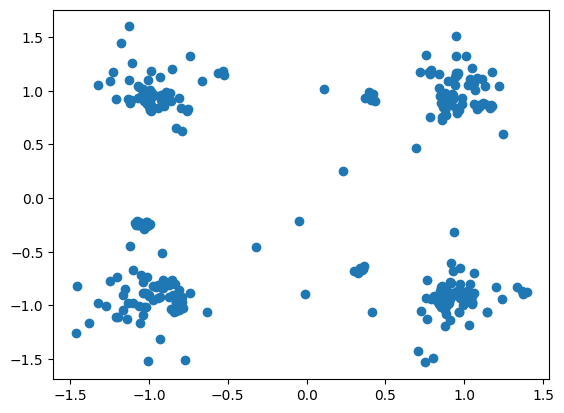

In [10]:
# Visualizing distrbution of words on computed vector representation

plt.scatter(vector_repr[:,0],vector_repr[:,1]) # first and second component

# for i in range(m):
#     plt.text(vector_repr[i][0],vector_repr[i][1],unique_words[i])

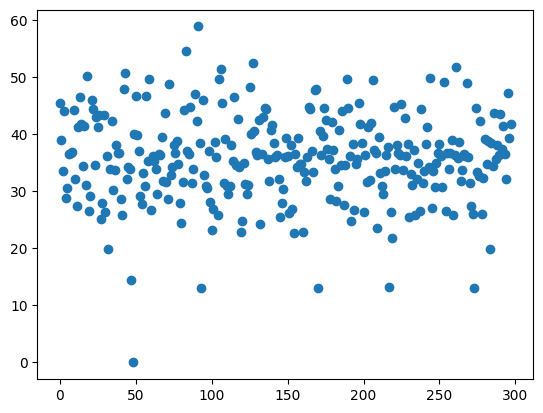

In [11]:
# Getting Close words 

word = 'AI'
ind = unique_words.index(word)
closeness = np.empty(m)

for i in range(m):                                            # Checking for close words 
    closeness[i] = np.sum((vector_repr[i]-vector_repr[ind])**2)  # with L2 norm
                                                               
sr = np.arange(m)
plt.scatter(sr,closeness)

In [12]:
# Printing Close Words

num_of_words = 10
# idx = np.argpartition(closeness,num_of_words)[0:num_of_words]
idx = np.argsort(closeness)[0:num_of_words]

for i in range(num_of_words):
    print(unique_words[idx[i]],end = ',')

AI,opportunities,catalyst,essential,time,intelligence,values.,practices.,Societal,personalizes,

In [13]:
# Next word

softmax = nn.Softmax(dim = 0)
out = np.array(softmax(model(one_hot_encode(word))).detach())
unique_words[np.where(out == np.max(out))[0][0]]

'requires'

In [24]:
class WordEmbeddings:

    def __init__(self,m,r):

        self.model = nn.Sequential(
            nn.Linear(m,r),
            nn.Linear(r,m),
        )
        self.loss_function = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.model.parameters(),lr = 0.01)
        self.unique_words = None

    def one_hot_encode_word(self,word):

        if (word in self.unique_words):
            m = len(self.unique_words)
            endcoded_word_index = self.unique_words.index(word)
            encoded_word = np.zeros(m)
            encoded_word[endcoded_word_index] = 1
            return torch.tensor(encoded_word,dtype = torch.float32)
        else :
            print("Query word not in trained words")
    
    def generate_encoded_dataset(self,words):

        unique_words = list(set(words))
        n = len(words)
        m = len(unique_words)
        X = np.zeros((n,m))
        y = np.zeros((n,m))
        for i in range(n-1):
            j = unique_words.index(words[i])
            j_next_word = unique_words.index(words[i+1])
            X[i][j] = 1
            y[i][j_next_word] = 1 
        return torch.tensor(X,dtype = torch.float32),torch.tensor(y,dtype = torch.float32)
        
    def train(self,X,y):

        # Training
        max_epochs = 2000
        # print(f'Initial Loss {self.loss_function(self.model(X),y)}')
        for e in range(max_epochs):
            y_hat = self.model(X)
            loss = self.loss_function(y_hat,y)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        # print(f'Final Loss {self.loss_function(self.model(X),y)}')

    def get_embedding(self,words):

        unique_words = list(set(words))
        self.unique_words = unique_words
        
        X,y = self.generate_encoded_dataset(words)
        self.train(X,y)
        params = []
        for param in self.model.parameters():
            params.append(param)
        embedding = np.array(params[0].detach()).T
        return embedding

    def next_word(self,word):

        if (word in self.unique_words):
            softmax = nn.Softmax(dim = 0)
            out = np.array(softmax(self.model(self.one_hot_encode_word(word))).detach())
            return self.unique_words[np.where(out == np.max(out))[0][0]]    
        else :
            print("Query word not in trained words") 
            

In [25]:
we = WordEmbeddings(m,r)
we.get_embedding(words)
print(we.next_word(words[56]))

and
